In [1]:
from receipt_generator import ReceiptJsonGenerator

rc = ReceiptJsonGenerator()

In [2]:
sample = rc()
# 大小写混合
sample

{'name': 'FATHOM EXPLOSIVES PRIMES',
 'Address': {'address1': '2649 Firewood Drive',
  'address2': '',
  'city': 'Fayetteville',
  'state': 'AR',
  'postalCode': '72703',
  'coordinates': {'lat': 36.09904, 'lng': -94.12062499999999}},
 'ROC NO': '90625-DB00AB34',
 'Invoice No': '127-A4F70C65',
 'Company Reg No': '0423-CFA56493',
 'GST Reg No': '0-B5E8E305',
 'TEL': '+1 (513) 669-5997',
 'fax': '485-189-1478',
 'email': 'JQd9PqO@bc.edu',
 'date': '1996-06-20',
 'cashier': 'mates south schedule',
 'Sales Persor': 'film',
 'Bill To': 'sole margins monolith',
 'cart': {'unit': 'Riyal',
  'items': [('schedule legs', 5, 50.94, 254.7),
   ('helmsman mint', 10, 19.38, 193.79999999999998),
   ('levels corks', 10, 71.57, 715.6999999999999),
   ('print span', 1, 97.3, 97.3),
   ('collision accountabilities', 10, 39.4, 394.0),
   ('view rescue', 2, 47.48, 94.96),
   ('tools store', 1, 28.04, 28.04),
   ('employees kilograms', 6, 49.0, 294.0),
   ('console energizers', 4, 97.64, 390.56),
   ('conta

11
-3.628024637699127
<class 'pymupdf.Page'>


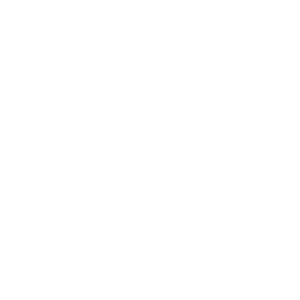

In [61]:
import random
import fitz
from io import BytesIO
from PIL import Image
import string

width_constant, height_constant = 0.5560000283377511, 1.3739991869245256
base_fontname = fitz.Base14_fontdict.keys()

def color():
    return (1,1,1)
    return (random.uniform(0,1),random.uniform(0,1),random.uniform(0,1))

def create_block(
    info: str,
    width: int,
    height: int,
):
    font_size = int(height / height_constant)
    max_char = int(width / font_size / width_constant)
    wid_delta = width
    ans = []
    ans.append((0,0,width,height,info,font_size,(0,0,0)))
    return ans

def head_block(
    info,
    height, # don't need
    width
):
    pass


def build_receipts(
    sample=sample,
    min_width=300,
    max_width=300,
    min_ratio=1,
    max_ratio=1,
    max_edge_dist=0.1,
    base_font=14,
):
    max_edge_dist = random.uniform(0.12, 0.2)
    width = random.randint(min_width,max_width)
    height = int(width * random.uniform(min_ratio,max_ratio))
    min_x = int(width * max_edge_dist)
    max_x = int(width * (1 - max_edge_dist))
    min_y = int(height * max_edge_dist)
    max_y = int(height - min_y)
    max_num_row = int((max_y - min_y) / (base_font * height_constant))
    print(max_num_row)
    # create a new page
    doc = fitz.open()
    page = doc.new_page(width=width,height=height)
    background_color = color()
    page.draw_rect(
        fitz.Rect(0, 0, width, height),
        color=background_color,
        fill=background_color,
        overlay=True
    )
    # now add the text to the page
    cnt = 0
    last_x, last_y = min_x, min_y
    while cnt < max_num_row:
        tmp_width = max_x - min_x
        delta = random.choices([1,2,3],weights=[0.9,0.05,0.05])[0]
        cnt += delta
        tmp_height = delta * base_font * height_constant
        blocks = create_block("hi",tmp_width,tmp_height)
        align = 0
        for x0,y0,x1,y1,content,font_size,colorr in blocks:
            rect = fitz.Rect(last_x+x0,last_y+y0,last_x+x1,last_y+y1)
            rc = page.insert_textbox(rect,content,fontsize=font_size-3,fontname="hebo", align=align, color=colorr)
            print(rc)
        last_y += tmp_height-10
        if cnt>1:
            break
    print(type(page))
    # get the image and textlines
    pix = page.get_pixmap()
    pix_bytes = pix.tobytes(output="png")
    pix = Image.open(BytesIO(pix_bytes)).convert("RGB")
    text_extract = []
    bboxs = []
    for block in page.get_text("dict")["blocks"]:
        for line in block["lines"]:
            cur_line = []
            for span in line["spans"]:
                text = span["text"].strip()
                if len(text) == 0:
                    continue
                cur_line.append(text)

            if len(cur_line) == 0:
                continue
            cur_line = " ".join(cur_line).strip()
            x0, y0, x1, y1 = (
                line["bbox"][0] / width,
                line["bbox"][1] / height,
                line["bbox"][2] / width,
                line["bbox"][3] / height,
            )
            try:
                assert 0 <= x0 <= 1, f"x0: {x0} "+cur_line
                assert 0 <= y0 <= 1, f"y0: {y0} "+cur_line
                assert 0 <= x1 <= 1, f"x1: {x1} "+cur_line
                assert 0 <= y1 <= 1, f"y1: {y1} "+cur_line
                bboxs.append([x0, y0, x1, y1])

                if len(cur_line) == 0:
                    continue
                text_extract.append(cur_line)
            except Exception as e:
                print(e)
                print(line["bbox"])
                return pix
    return {
        "lines": text_extract,
        "bboxs": bboxs,
        "image": pix,
    }
receipt = build_receipts()
img = receipt['image']
img

In [60]:
type(page)

NameError: name 'page' is not defined

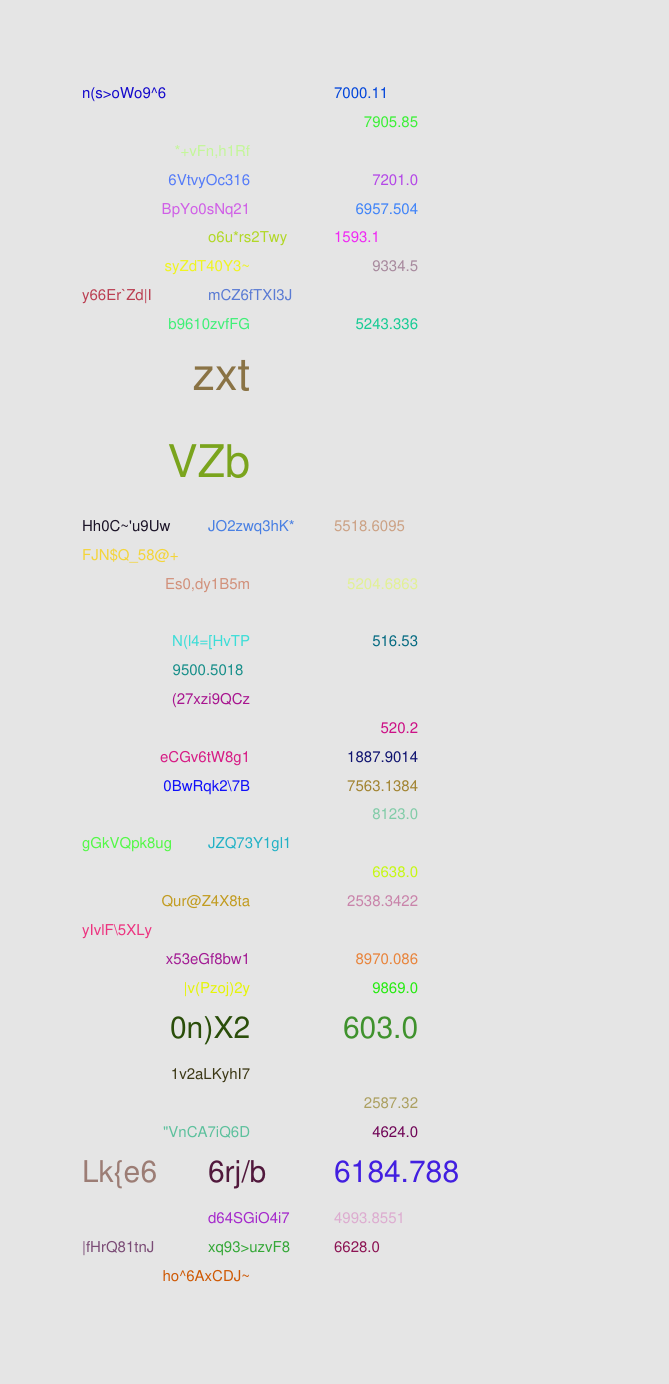

In [2]:
import random
import fitz
from io import BytesIO
from PIL import Image
import string

width_constant, height_constant = 0.5560000283377511 * 1.4,1.3739991869245256 * 1.4

def color():
    return (random.uniform(0,1),random.uniform(0,1),random.uniform(0,1))

def bg_color():
    choice = random.choice(['white', 'yellow', 'grey'])
    if choice == 'white':
        return (random.uniform(0.9, 1.0), random.uniform(0.9, 1.0), random.uniform(0.9, 1.0))
    elif choice == 'yellow':
        return (random.uniform(0.9, 1.0), random.uniform(0.9, 1.0), random.uniform(0.0, 0.1))
    elif choice == 'grey':
        value = random.uniform(0.8, 0.9)
        return (value, value, value)

def create_block(
    text: str,
    num: int,
    width: int,
    height: int,
):
    num = max(1,min(4,num))
    font_size = int(height / height_constant)
    max_char = int(width / font_size / width_constant)
    wid_delta = width // (num+1)
    ans = []
    for i in range(num):
        x = int(i * wid_delta)
        y = int(height)
        if i+1 == num:
            t = generate_random_number_string()
        else:
            t = generate_weighted_random_string(max_char // 4)
        if random.random() < 0.8:
            ans.append((x,0,x+wid_delta,y,t,font_size,color()))
    return ans


def build_receipts(
    sample=sample,
    min_width=256,
    max_width=768,
    min_ratio=1,
    max_ratio=3,
    max_edge_dist=0.1,
    base_font=14,
):
    base_font = random.randint(14, 16)
    max_edge_dist = random.uniform(0.12, 0.2)
    width = random.randint(min_width,max_width)
    height = width * random.uniform(min_ratio,max_ratio)
    # based on the width and height, we can layout of the text
    
    min_x = width * max_edge_dist
    max_x = width * (1 - max_edge_dist)
    min_y = min_x
    max_y = height - min_y
    min_x = int(min_x)
    max_x = int(max_x)
    min_y = int(min_y)
    max_y = int(max_y)

    max_num_row = int((max_y - min_y) / (base_font * height_constant))

    doc = fitz.open()
    page = doc.new_page(width=width,height=height)
    background_color = bg_color()
    page.draw_rect(
        fitz.Rect(0, 0, width, height),
        color=background_color,
        fill=background_color,
        overlay=True
    )
    # add text part
    # 只有一个line或者两个
    cnt = 0
    last_x, last_y = min_x, min_y
    while cnt < max_num_row:
        tmp_width = max_x - min_x
        delta = random.choices([1,2,3],weights=[0.9,0.05,0.05])[0]
        cnt += delta
        tmp_height = delta * base_font * height_constant
        num = random.choices([1,2,3],weights=[0.1,0.5,0.2])[0]
        blocks = create_block(text,num,tmp_width,tmp_height)
        align = num % 3
        for x0,y0,x1,y1,content,font_size, color in blocks:
            rect = fitz.Rect(last_x+x0,last_y+y0,last_x+x1,last_y+y1)
            rc = page.insert_textbox(rect,content,fontsize=font_size, align=align, color=color)
            # print(rc)
        last_y += tmp_height
    pix = page.get_pixmap()
    pix_bytes = pix.tobytes(output="png")
    pix = Image.open(BytesIO(pix_bytes)).convert("RGB")
    # extract bbox and text line part
    text_extract = []
    bboxs = []
    for block in page.get_text("dict")["blocks"]:
        for line in block["lines"]:
            cur_line = []
            for span in line["spans"]:
                text = span["text"].strip()
                if len(text) == 0:
                    continue
                cur_line.append(text)

            if len(cur_line) == 0:
                continue
            cur_line = " ".join(cur_line).strip()
            x0, y0, x1, y1 = (
                line["bbox"][0] / width,
                line["bbox"][1] / height,
                line["bbox"][2] / width,
                line["bbox"][3] / height,
            )
            try:
                assert 0 <= x0 <= 1, f"x0: {x0} "+cur_line
                assert 0 <= y0 <= 1, f"y0: {y0} "+cur_line
                assert 0 <= x1 <= 1, f"x1: {x1} "+cur_line
                assert 0 <= y1 <= 1, f"y1: {y1} "+cur_line
                bboxs.append([x0, y0, x1, y1])

                if len(cur_line) == 0:
                    continue
                text_extract.append(cur_line)
            except Exception as e:
                print(e)
                print(line["bbox"])
                return pix

    return {
            "lines": text_extract,
            "bboxs": bboxs,
            "image": pix,
        }
receipt = build_receipts()
img = receipt['image']
img